# Assigment 3-2d - Web application

In [75]:
# !pip install gradio

In [77]:
import numpy as np
import pandas as pd
import keras
import gradio as gr

from skimage.transform import resize
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
cnn_model = keras.models.load_model('drive/MyDrive/assignment3_models/model.keras')
resnet_model = keras.models.load_model('drive/MyDrive/assignment3_models/resnet_model.keras')

We load the class labels in order to present the name of the insect in the app. This is the reduced set of class labels based on our data preprocessing.

In [44]:
class_labels = pd.read_csv('drive/MyDrive/assignment3_models/classes_adj.txt', sep='^([^ ]+) ', header=None, usecols=[2], names=['name'], engine='python')

Now we define the function to be passed to the Gradio interface. This will take in an image and model name and return the corresponding prediction.

In [73]:
def inference(image, model_name):
  if model_name == 'CNN':
    model = cnn_model
  elif model_name == 'ResNet':
    model = resnet_model

  resized_image = np.expand_dims(resize(image, (256, 256)), 0)
  prediction = model.predict(resized_image).argmax()
  prediction_label = class_labels.iloc[prediction]['name']
  return prediction_label

Our simple app consists of an image and dropdown input and a text output.

In [78]:
dropdown = gr.Dropdown(
    ['CNN', 'ResNet'],
    label='Inference Model',
)

app = gr.Interface(
    fn=inference,
    inputs=['image', dropdown],
    outputs=gr.Textbox(label='Prediction'),
)
app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d4e8133e1a9d678369.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Screenshots of the Gradio app

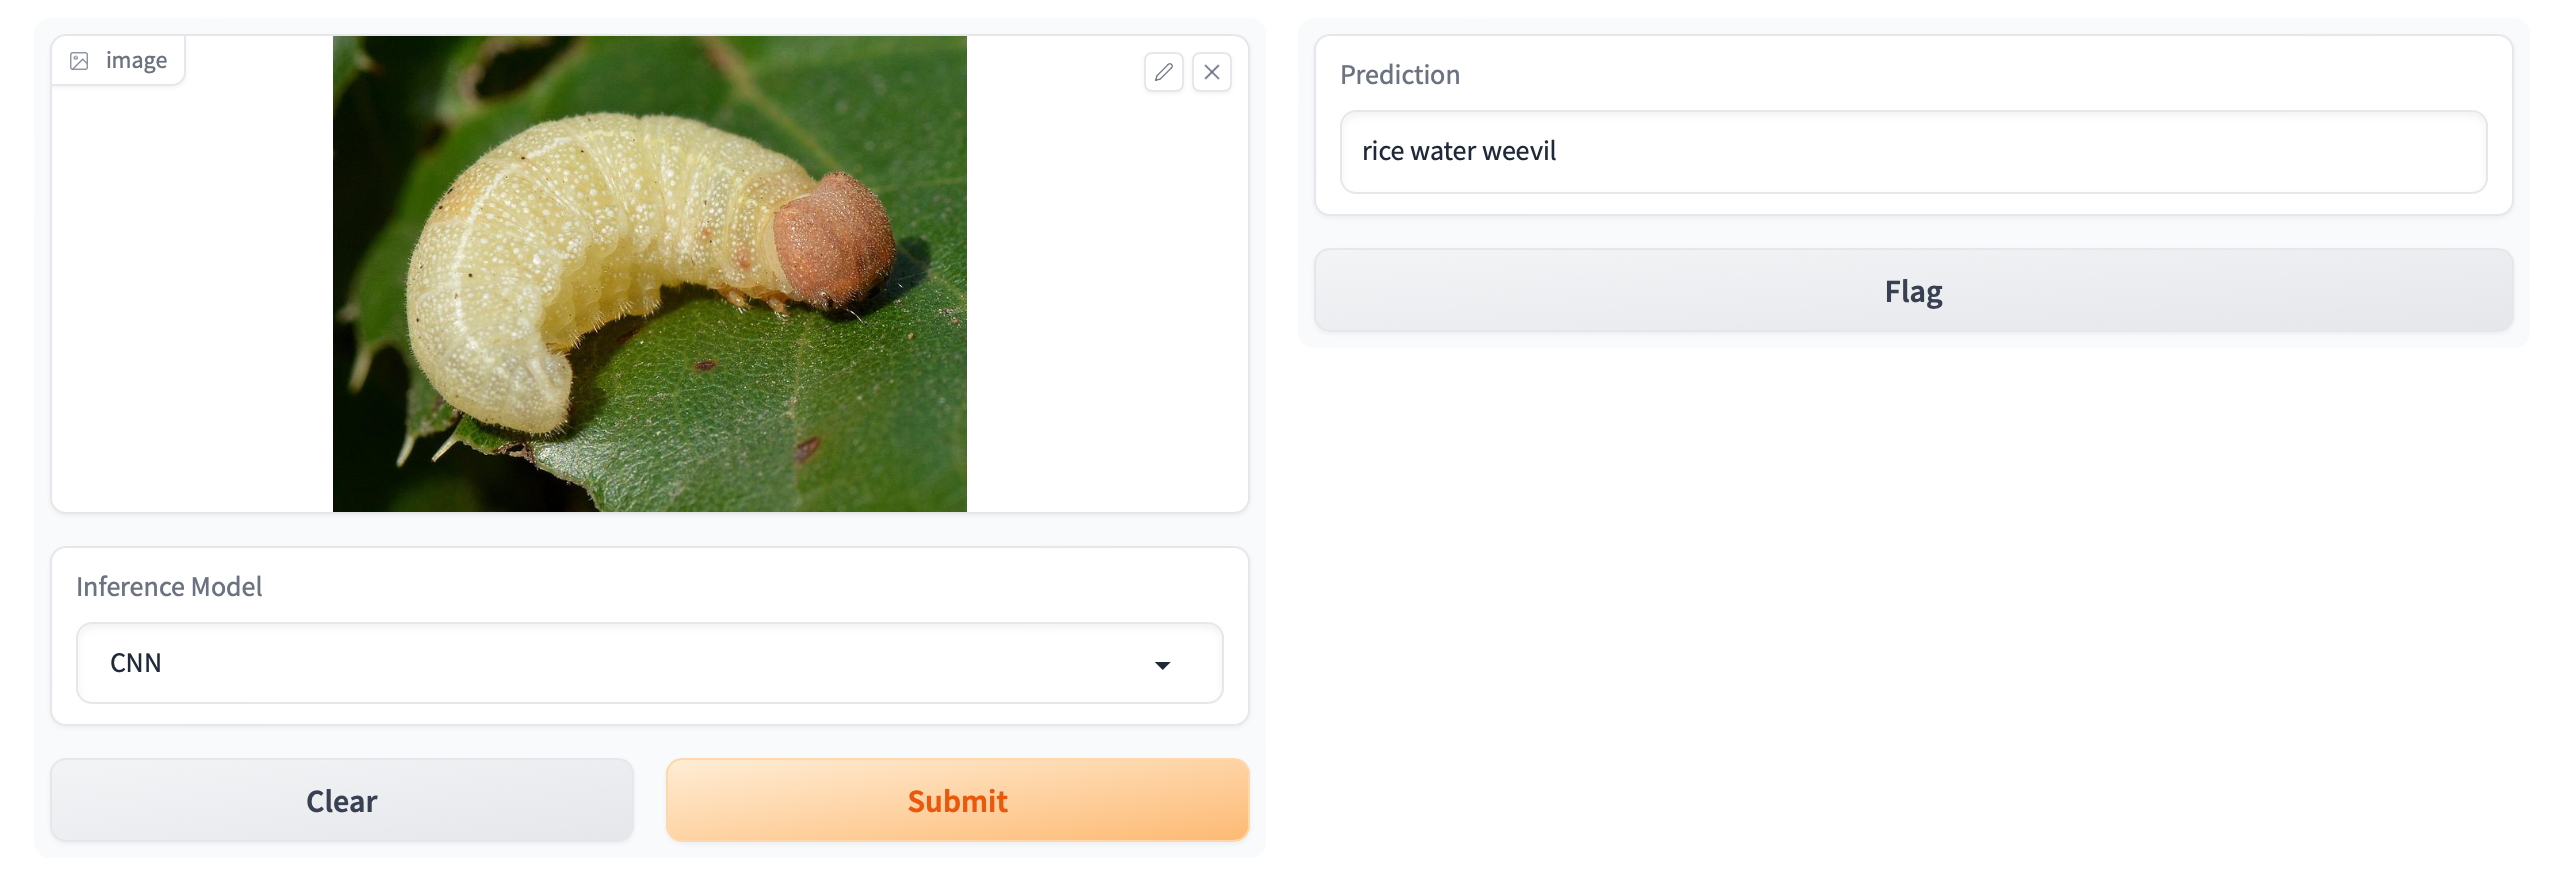

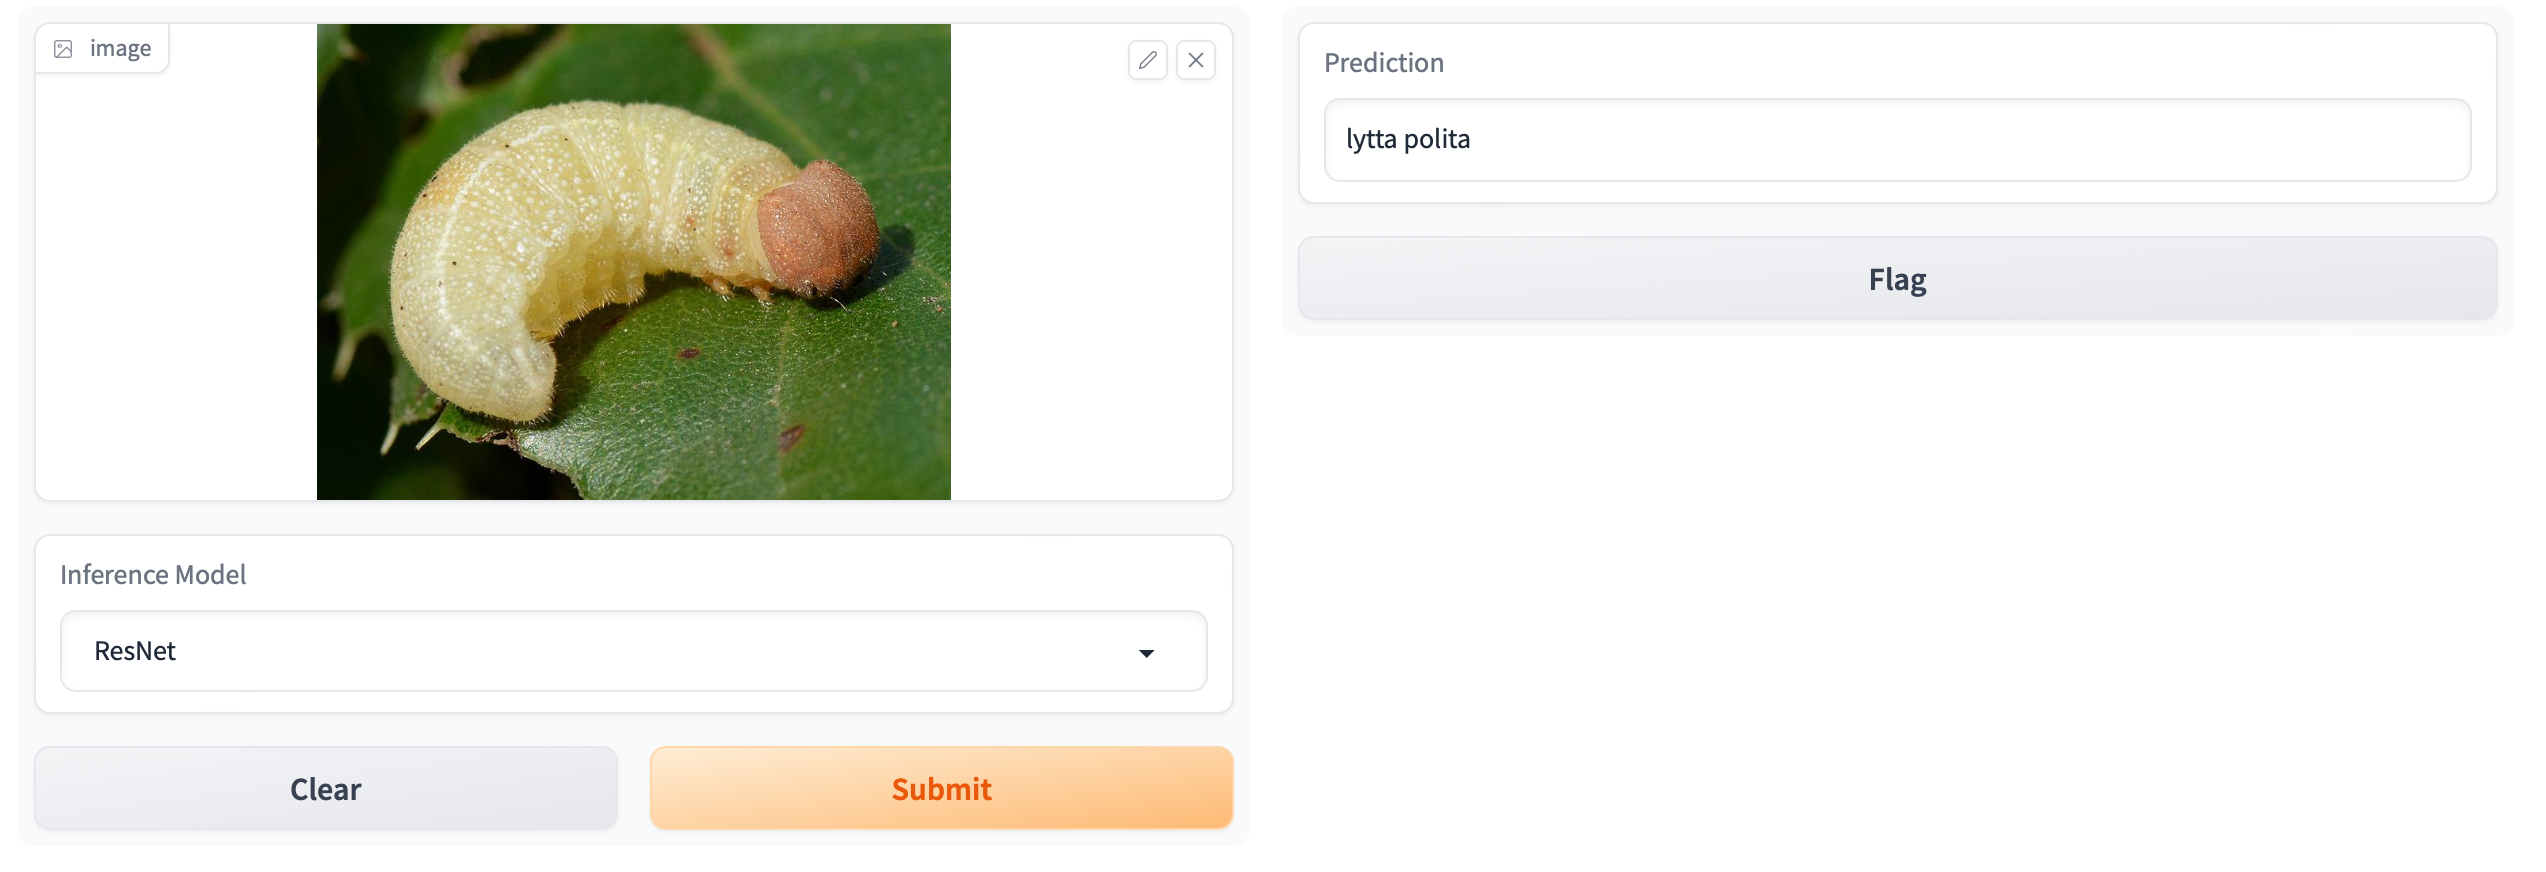